## EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud, STOPWORDS
import missingno as msno

##Ingesta de datos obtenidos del ETL

In [8]:
df1 = pd.read_parquet('Data_Movies.parquet')
pd.options.display.float_format = "{:.3f}".format

#### Visualizacion de valores vacios

In [7]:
# Reemplazar los strings "nan" con valores np.nan
df1.replace("nan", np.nan, inplace=True)


<Axes: >

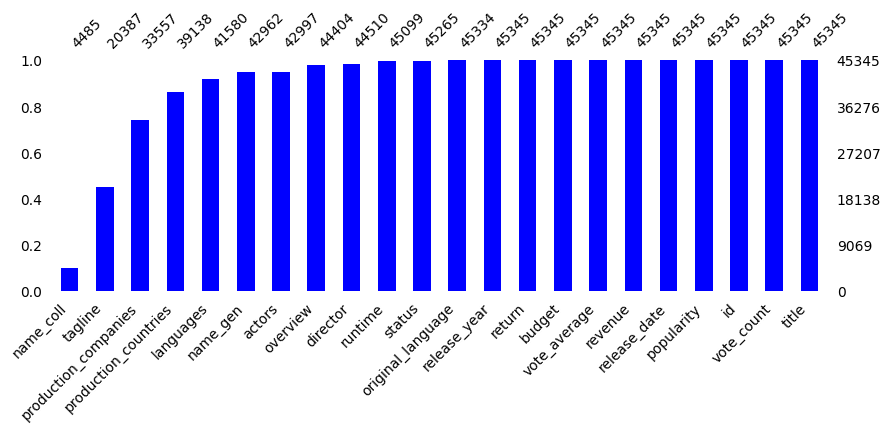

In [10]:
# Análisis de datos faltantes mediante missingno
# Graficar datos faltantes de las variables. Se observa que hay valores faltantes que representan un porcentaje alto del total
msno.bar(df1,figsize=(10, 3), sort="ascending",fontsize=10, color='blue')

In [11]:
# Calcular el porcentaje de datos faltantes en cada columna
df1.isnull().mean() * 100


budget                  0.000
id                      0.000
original_language       0.024
overview                2.075
popularity              0.000
release_date            0.000
revenue                 0.000
runtime                 0.543
status                  0.176
tagline                55.040
title                   0.000
vote_average            0.000
vote_count              0.000
name_coll              90.109
name_gen                5.255
production_companies   25.996
production_countries   13.688
languages               8.303
return                  0.000
release_year            0.000
actors                  5.178
director                1.841
dtype: float64

Se eliminan las columnas un porcentaje mayor al 10% de datos faltantes

In [12]:
threshold = 10
missing_percentage = df1.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df1c = df1.drop(columns=columns_to_drop)

In [13]:
df1c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45345 non-null  int64         
 1   id                 45345 non-null  int32         
 2   original_language  45334 non-null  object        
 3   overview           44404 non-null  object        
 4   popularity         45345 non-null  float64       
 5   release_date       45345 non-null  datetime64[ns]
 6   revenue            45345 non-null  float64       
 7   runtime            45099 non-null  float64       
 8   status             45265 non-null  object        
 9   title              45345 non-null  object        
 10  vote_average       45345 non-null  float64       
 11  vote_count         45345 non-null  float64       
 12  name_gen           42962 non-null  object        
 13  languages          41580 non-null  object        
 14  return

<Axes: >

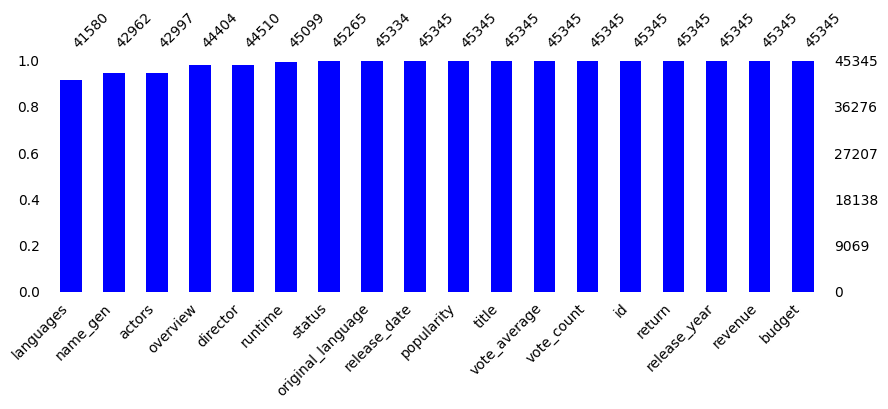

In [15]:
# Graficar nuevamente los datos faltantes de las variables
msno.bar(df1c,figsize=(10, 3), sort="ascending",fontsize=10, color='blue')

## Relaciones


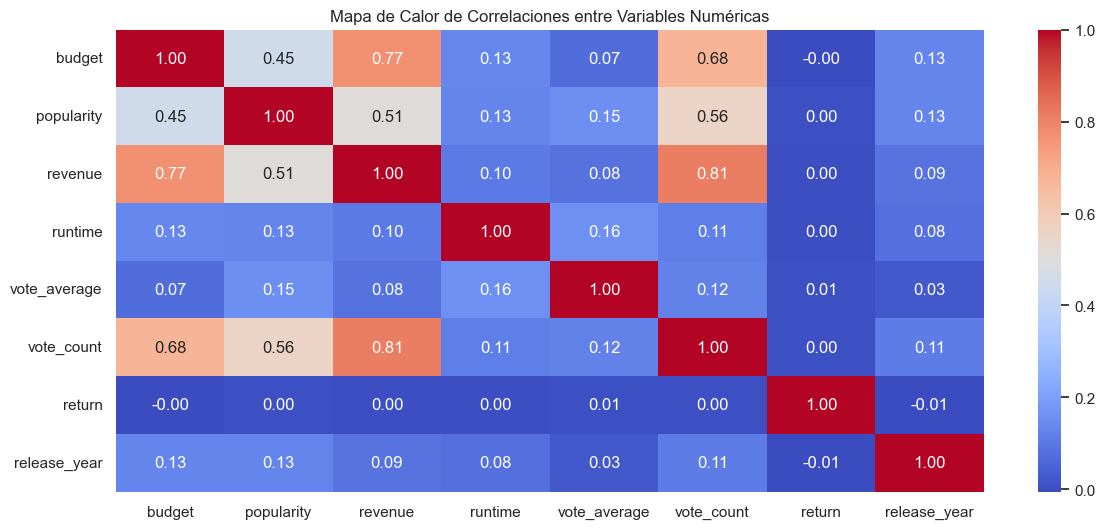

In [16]:
# Filtrar solo las columnas numéricas relevantes para la correlación
numerical_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'release_year']
df_numerical = df1c[numerical_columns]

# Crear el mapa de calor
plt.figure(figsize=(14, 6))
sns.set(font_scale=1)
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

## Variables Categóricas y Numéricas: análisis entre tres variables 
Se estudia la relación entre las variables categóricas 'actors'y 'director' con la variable 'popularity'. Se muestra un top 10 de los actores que protagonizaron más películas y de los directores que dirigieron la mayor cantidad de películas, con sus respectiva popularidad.

In [17]:
# Asegurarnos de que no haya valores NaN en las columnas 'actors', 'director' y 'popularity'
df1c = df1c.dropna(subset=['actors', 'director', 'popularity'])

# Extraer el primer actor de la lista en la columna 'actors'
df1c['first_actor'] = df1c['actors'].apply(lambda x: x.split(',')[0] if pd.notna(x) else '')

# Extraer el primer director de la lista en la columna 'director'
df1c['first_director'] = df1c['director'].apply(lambda x: x.split(',')[0] if pd.notna(x) else '')

# Obtener los 10 directores que más películas han dirigido
top_directors = df1c['first_director'].value_counts().head(10)
top_directors_names = top_directors.index.tolist()

# Obtener los 10 actores que más películas han protagonizado
top_actors = df1c['first_actor'].value_counts().head(10)
top_actors_names = top_actors.index.tolist()

# Filtrar el DataFrame para los directores y actores más frecuentes
df_top_directors = df1c[df1c['first_director'].isin(top_directors_names)]
df_top_actors = df1c[df1c['first_actor'].isin(top_actors_names)]

# Calcular la popularidad promedio para los directores
avg_popularity_directors = df_top_directors.groupby('first_director')['popularity'].mean().reindex(top_directors_names).reset_index()

# Calcular la popularidad promedio para los actores
avg_popularity_actors = df_top_actors.groupby('first_actor')['popularity'].mean().reindex(top_actors_names).reset_index()

# Calcular la popularidad total para cada director
director_popularity = df1c.groupby('first_director')['popularity'].mean().reset_index()
director_popularity = director_popularity.sort_values(by='popularity', ascending=False)
top_10_directors_popularity = director_popularity.head(10)

# Calcular la popularidad total para cada actor
actor_popularity = df1c.groupby('first_actor')['popularity'].mean().reset_index()
actor_popularity = actor_popularity.sort_values(by='popularity', ascending=False)
top_10_actors_popularity = actor_popularity.head(10)




C:\Users\USUARIO\AppData\Local\Temp\ipykernel_11696\2616796193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis', ax=axes[0, 0])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_11696\2616796193.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='first_director', data=avg_popularity_directors, palette='plasma', ax=axes[2, 0])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_11696\2616796193.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='

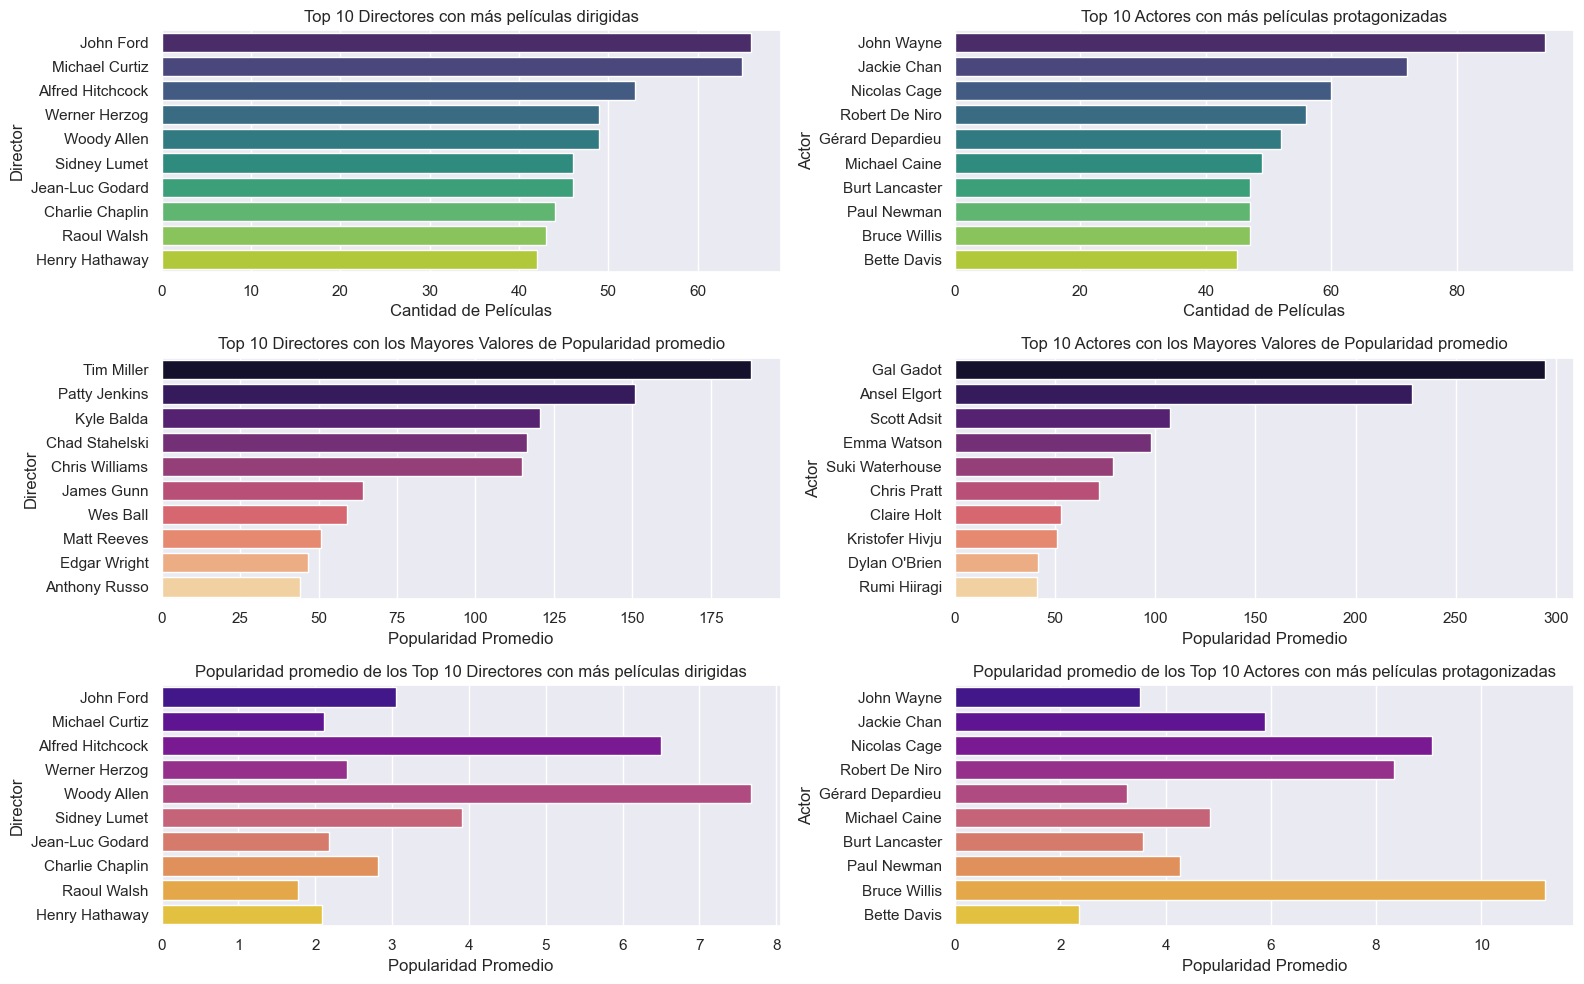

In [18]:
# Graficar los resultados
fig, axes = plt.subplots(3, 2, figsize=(16, 10))

# Gráfico de barras para directores más prolíficos
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Directores con más películas dirigidas')
axes[0, 0].set_xlabel('Cantidad de Películas')
axes[0, 0].set_ylabel('Director')

# Gráfico de barras para la popularidad promedio de los directores más prolíficos
sns.barplot(x='popularity', y='first_director', data=avg_popularity_directors, palette='plasma', ax=axes[2, 0])
axes[2, 0].set_title('Popularidad promedio de los Top 10 Directores con más películas dirigidas')
axes[2, 0].set_xlabel('Popularidad Promedio')
axes[2, 0].set_ylabel('Director')


# Gráfico de barras para la popularidad promedio de los actores más prolíficos
sns.barplot(x='popularity', y='first_actor', data=avg_popularity_actors, palette='plasma', ax=axes[2, 1])
axes[2, 1].set_title('Popularidad promedio de los Top 10 Actores con más películas protagonizadas')
axes[2, 1].set_xlabel('Popularidad Promedio')
axes[2, 1].set_ylabel('Actor')



# Gráfico de barras para los actores con mayores valores de popularidad
sns.barplot(x='popularity', y='first_actor', data=top_10_actors_popularity, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Actores con los Mayores Valores de Popularidad promedio')
axes[1, 1].set_xlabel('Popularidad Promedio')
axes[1, 1].set_ylabel('Actor')



# Gráfico de barras para actores más prolíficos
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Actores con más películas protagonizadas')
axes[0, 1].set_xlabel('Cantidad de Películas')
axes[0, 1].set_ylabel('Actor')




# Gráfico de barras para los directores con mayores valores de popularidad
sns.barplot(x='popularity', y='first_director', data=top_10_directors_popularity, palette='magma', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Directores con los Mayores Valores de Popularidad promedio')
axes[1, 0].set_xlabel('Popularidad Promedio')
axes[1, 0].set_ylabel('Director')

plt.tight_layout()
plt.show()